In [1]:
import torch
weights = torch.load('weights.pt', weights_only=True)

model = torch.nn.Sequential(
    torch.nn.Linear(64*3, 64),
    torch.nn.Sigmoid(),
    torch.nn.Linear(64, 1),
    torch.nn.Sigmoid(),
)

model.load_state_dict(weights)

torch.onnx.export(
    model,
    (torch.zeros(128, 64*3),),
    "model.onnx",
    input_names=["rows"]
)

In [2]:
import onnxruntime
sess = onnxruntime.InferenceSession("model.onnx")

0.99976945
95.3125 % of rows are detected as purple


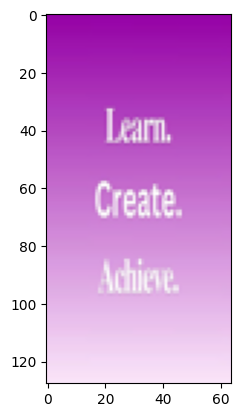

In [7]:
import numpy as np
from PIL import Image
image = Image.open("test_dataset/purple/Dropped Image (6).png").convert('RGB').resize((64, 128))
image = np.array(image)

from matplotlib.pyplot import imshow
imshow(image)

image = image.reshape(128, -1) / 255.0

result = sess.run(None, {"rows": image.astype(np.float32)})[0]
print(result.max())
result = result > 0.5
print(result.sum() / len(result) * 100, "% of rows are detected as purple")